This notebook demonstrates loading the model from torch.hub.

In [1]:
import torch
from matplotlib import pyplot
import torchvision

Use torch.hub to load the model and weights:

In [2]:
model = torch.hub.load('ndahlquist/lernapparat:0.0.1', 'style_gan', pretrained=True)

Using cache found in /Users/nicolas.dahlquist/.cache/torch/hub/ndahlquist_lernapparat_0.0.1


Run the model and visualize some results:

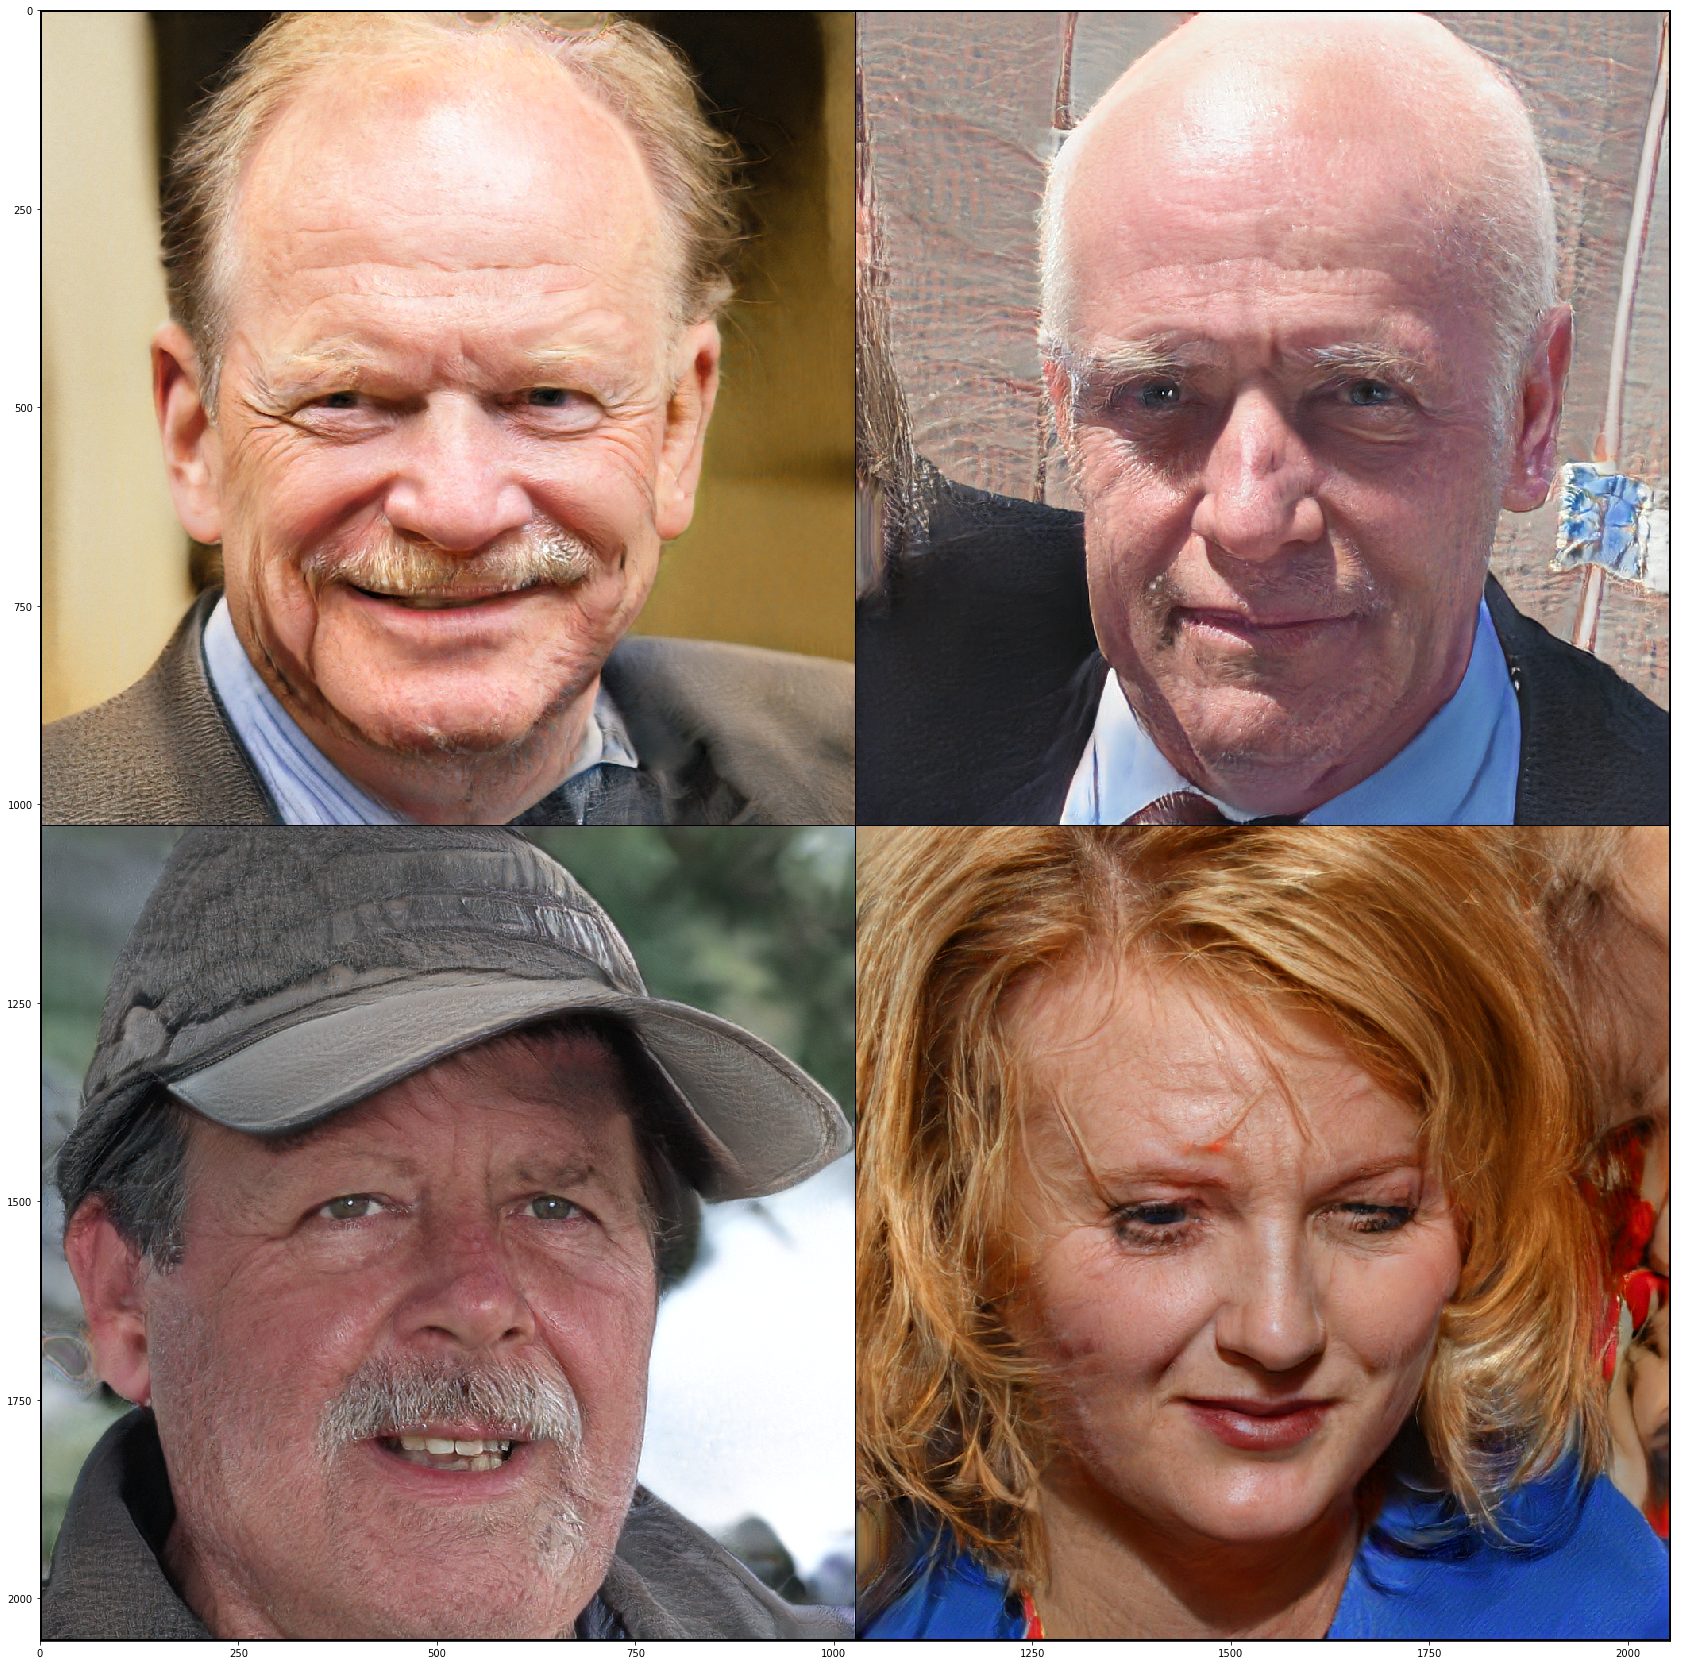

In [3]:
%matplotlib inline

model.eval()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model.to(device)

nb_rows = 2
nb_cols = 2
nb_samples = nb_rows * nb_cols
latents = torch.randn(nb_samples, 512, device=device)
with torch.no_grad():
    imgs = model(latents)
    # normalization to 0..1 range
    imgs = (imgs.clamp(-1, 1) + 1) / 2.0
imgs = imgs.cpu()

imgs = torchvision.utils.make_grid(imgs, nrow=nb_cols)

pyplot.figure(figsize=(30, 30))
pyplot.imshow(imgs.permute(1, 2, 0).detach().numpy())

pyplot.show()